In [94]:
import pandas as pd

df = pd.read_excel(io='data/cams_20230109.xlsx')
print(df)

df.drop(df.columns[0], axis=1, inplace=True)
print(df)

df.rename(columns={'Широта': 'Latitude', 'Долгота': 'Longitude'}, inplace=True)
print(df)


                                    Адрес на 09.01.2023     Широта    Долгота
0     ул.Подольских Курсантов, напротив д.26, с.1, г...  55.591297  37.635121
1                     Ленинградское ш., д.47, г. Москва  55.846612  37.475901
2                  Варшавское ш., вл.179 с.1, г. Москва  55.553890  37.587548
3                      Энтузиастов ш., д.33Л, г. Москва  55.759266  37.756001
4        МКАД 78 км, внутренняя сторона, с.2, г. Москва  55.887932  37.486518
...                                                 ...        ...        ...
4052                 ул.Мосфильмовская, д.55, г. Москва  55.704088  37.494905
4053       ул.Мосфильмовская, д.88, к.2, с.7, г. Москва  55.704317  37.495166
4054  ул.Велозаводская, д.1 по ул.Автозаводская, г. ...  55.710768  37.665704
4055  Каширское ш., д.80Г, съезд на Шипиловский прое...  55.635877  37.695792
4056  Андропова просп. напротив д.10А, дублер, в цен...  55.692223  37.666714

[4057 rows x 3 columns]
         Широта    Долгота
0     55.591

In [95]:
# предварительная нормализация
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
names = df.columns
scaled_data = scaler.fit_transform(df)

df_std = pd.DataFrame(scaled_data, columns=names)

print(df_std)


      Latitude  Longitude
0     0.429165   0.717037
1     0.721658   0.569892
2     0.386311   0.673071
3     0.621593   0.828749
4     0.768995   0.579703
...        ...        ...
4052  0.558380   0.587454
4053  0.558642   0.587696
4054  0.566033   0.745300
4055  0.480236   0.773106
4056  0.544787   0.746234

[4057 rows x 2 columns]


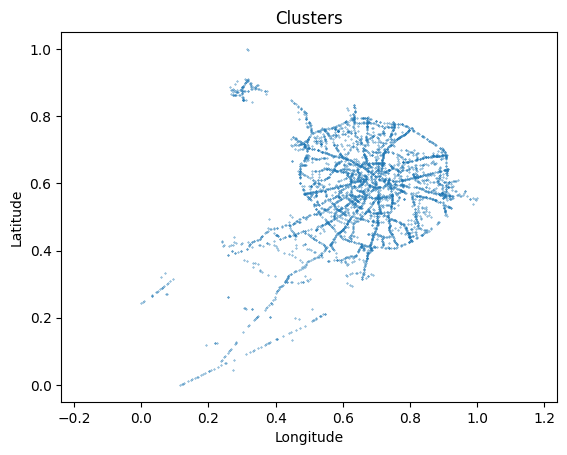

In [96]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df_std['Longitude'], df_std['Latitude'], s=0.1)
plt.title('Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.savefig('output/pic-stock.png')
plt.show()


In [97]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=11, init='k-means++', n_init='auto')
df['label'] = kmeans.fit_predict(df_std)
df_std['label'] = kmeans.fit_predict(df_std)

print(kmeans.cluster_centers_)
print(df_std)

df.to_csv('output/labeled.csv', index=False)
df_std.to_csv('output/labeled_std.csv', index=False)


[[0.71944679 0.7222496 ]
 [0.35743942 0.40334552]
 [0.60053328 0.53953719]
 [0.61377556 0.86453514]
 [0.88053279 0.31131164]
 [0.59595015 0.67375269]
 [0.15109401 0.21788554]
 [0.49809837 0.7686332 ]
 [0.4131566  0.66358954]
 [0.73388655 0.54992689]
 [0.47582035 0.55371117]]
      Latitude  Longitude  label
0     0.429165   0.717037      8
1     0.721658   0.569892      9
2     0.386311   0.673071      8
3     0.621593   0.828749      3
4     0.768995   0.579703      9
...        ...        ...    ...
4052  0.558380   0.587454      2
4053  0.558642   0.587696      2
4054  0.566033   0.745300      7
4055  0.480236   0.773106      7
4056  0.544787   0.746234      7

[4057 rows x 3 columns]


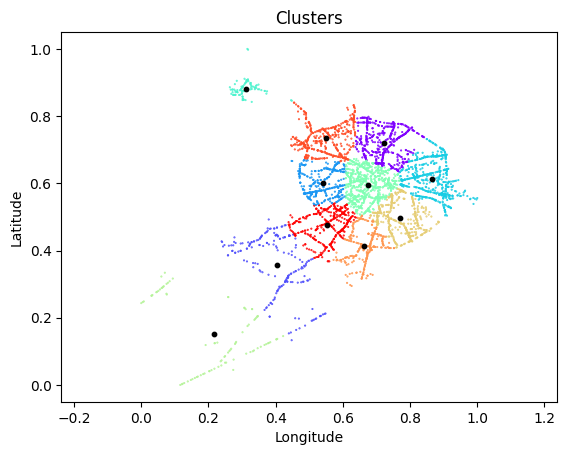

In [98]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df_std['Longitude'], df_std['Latitude'], c=df_std['label'], s=0.25, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], c='black', s=10)
plt.title('Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.savefig('output/pic-11.png')
plt.show()
